In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [2]:
from tensorflow.keras.layers import Flatten , Dense , BatchNormalization , Dropout ,Conv2D,MaxPool2D

In [3]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [6]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Total 7873 (delta 0), reused 0 (delta 0), pack-reused 7873
Receiving objects: 100% (7873/7873), 246.59 MiB | 38.10 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [7]:
data = pd.read_csv('./Movies-Poster_Dataset/train.csv')

In [30]:
img_width = 224
img_height = 224
X = []
for i in tqdm(range(data.shape[0])):
    path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
    img = image.load_img(path,target_size=(img_width,img_height,3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)
X = np.array(X)

100%|██████████| 7254/7254 [00:25<00:00, 283.85it/s]


In [31]:
X.shape

(7254, 224, 224, 3)

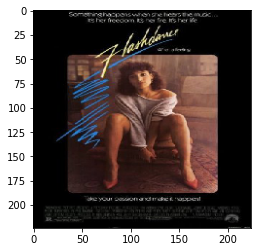

In [32]:
plt.imshow(X[1])

In [33]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

"['Comedy']"

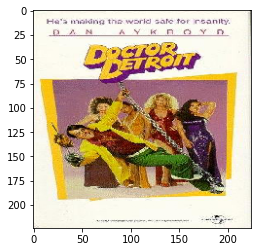

In [34]:
plt.imshow(X[54])
data['Genre'][54]


In [35]:
data.head(3)

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
y = data.drop(['Id','Genre'],axis = 1)
y = y.to_numpy()

In [37]:
y.shape

(7254, 25)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.15)

In [39]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid'))




In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
batch_normalization_12 (Batc (None, 222, 222, 16)      64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
batch_normalization_13 (Batc (None, 109, 109, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 32)       

In [41]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
193/193 [==============================] - 355s 2s/step - loss: 0.6999 - accuracy: 0.1176 - val_loss: 1.7783 - val_accuracy: 0.0046
Epoch 2/5
193/193 [==============================] - 354s 2s/step - loss: 0.3140 - accuracy: 0.2529 - val_loss: 0.2683 - val_accuracy: 0.1882
Epoch 3/5
193/193 [==============================] - 355s 2s/step - loss: 0.2612 - accuracy: 0.2830 - val_loss: 0.2520 - val_accuracy: 0.2213
Epoch 4/5
193/193 [==============================] - 355s 2s/step - loss: 0.2521 - accuracy: 0.3030 - val_loss: 0.2506 - val_accuracy: 0.2580
Epoch 5/5
193/193 [==============================] - 360s 2s/step - loss: 0.2460 - accuracy: 0.3088 - val_loss: 0.2499 - val_accuracy: 0.2406
